In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

Signal za testiranje:
$$
f(t) = 2sin(2\pi t) + 3sin(2\pi 22t) + \varepsilon
$$

In [95]:
def test_signal(t, noise=True):
    tmp =  2*np.sin(2*np.pi*t) + 3*np.sin(22*2*np.pi*t)
    return tmp + 2*np.random.randn(np.shape(t)[0]) if noise else tmp

In [96]:
target_frequency = 30
sample_frequency = 2*target_frequency #Hz   <- How often we sample?
resolution = 0.01 #Hz                       <- difference between two neighbor frequencies
sample_size = int(sample_frequency / resolution) # 6000 samples
sample_period = sample_size / sample_frequency #s    100 secods

print("Target frequency: {}Hz".format(target_frequency))
print("Resolution of freq specter: {}Hz\n".format(resolution))
print("Required sample frequency: {}Hz".format(sample_frequency))
print("Sample period: {} seconds".format(sample_period))
print("Sample size: {}".format(sample_size))

t = np.linspace(0, 100, sample_size, endpoint=True)

Target frequency: 30Hz
Resolution of freq specter: 0.01Hz

Required sample frequency: 60Hz
Sample period: 100 seconds
Sample size: 6000


In [97]:
f = test_signal(t)
f.shape

(6000,)

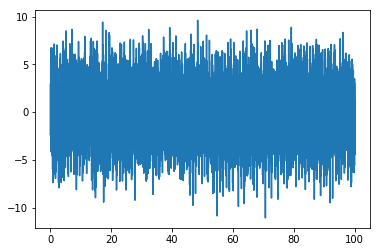

In [98]:
# plt.xlim(0, 5)
plt.plot(t, f)

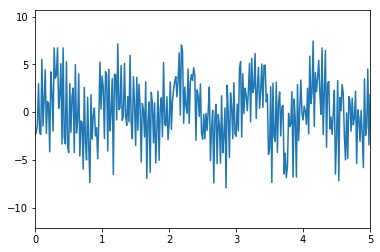

In [99]:
plt.xlim(0, 5)
plt.plot(t, f)

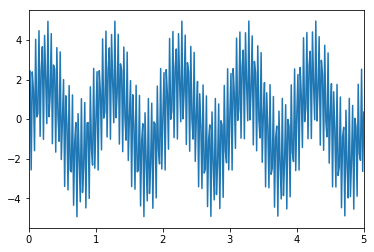

In [101]:
plt.xlim(0, 5)
real_signal = test_signal(t, False)
plt.plot(t, real_signal)

In [14]:
# Izracunavamo koeficijente furijeove transformacije
c = np.fft.fft(f)
c.shape

(6000,)

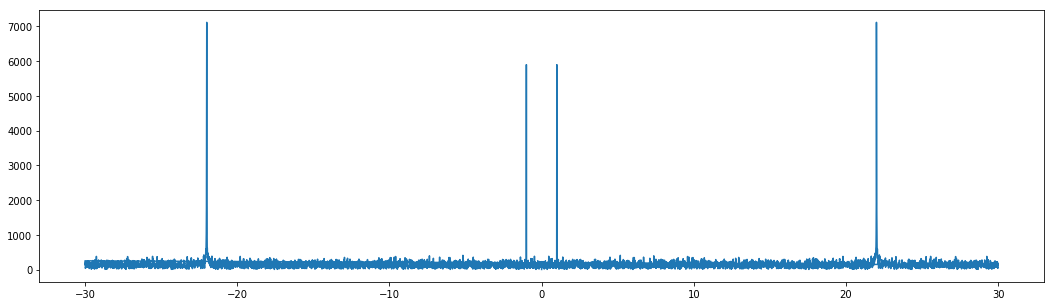

In [75]:
plt.figure(figsize=(18, 5))

# Izvlacimo frekvencije koje je izdvojio FFT
freq = np.fft.fftfreq(sample_size, 1.0/sample_frequency)
# plt.scatter(domain, np.abs(c))
plt.plot(freq, np.abs(c))

<StemContainer object of 3 artists>

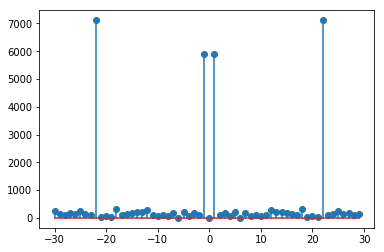

In [77]:
# Iscrtavamo frekvenciju
plt.stem(freq[::100], np.abs(c)[::100])

<StemContainer object of 3 artists>

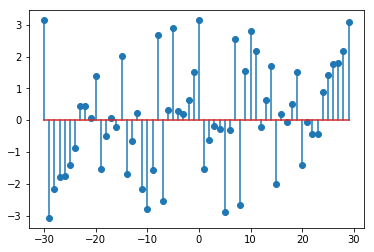

In [78]:
# Iscrtavamo i fazu
plt.stem(freq[::100], np.angle(c)[::100])

In [83]:
# Pravimo filter - hocemo da eliminisemo frekvenciju cije su amplitude manje od 2 (tj elim. suma)
c_filtered = c*(np.abs(freq) < 2)

<StemContainer object of 3 artists>

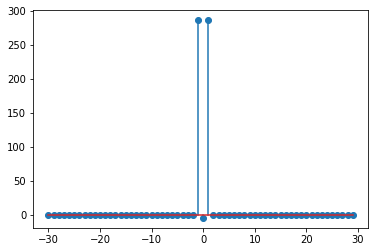

In [90]:
plt.stem(freq[::100], c_filtered[::100])
# plt.scatter(freq, c_filtered)

In [92]:
# Rekonstruisemo originalni signal sa inverznom furijeovom transformacijom
f_filtered = np.fft.ifft(c_filtered)

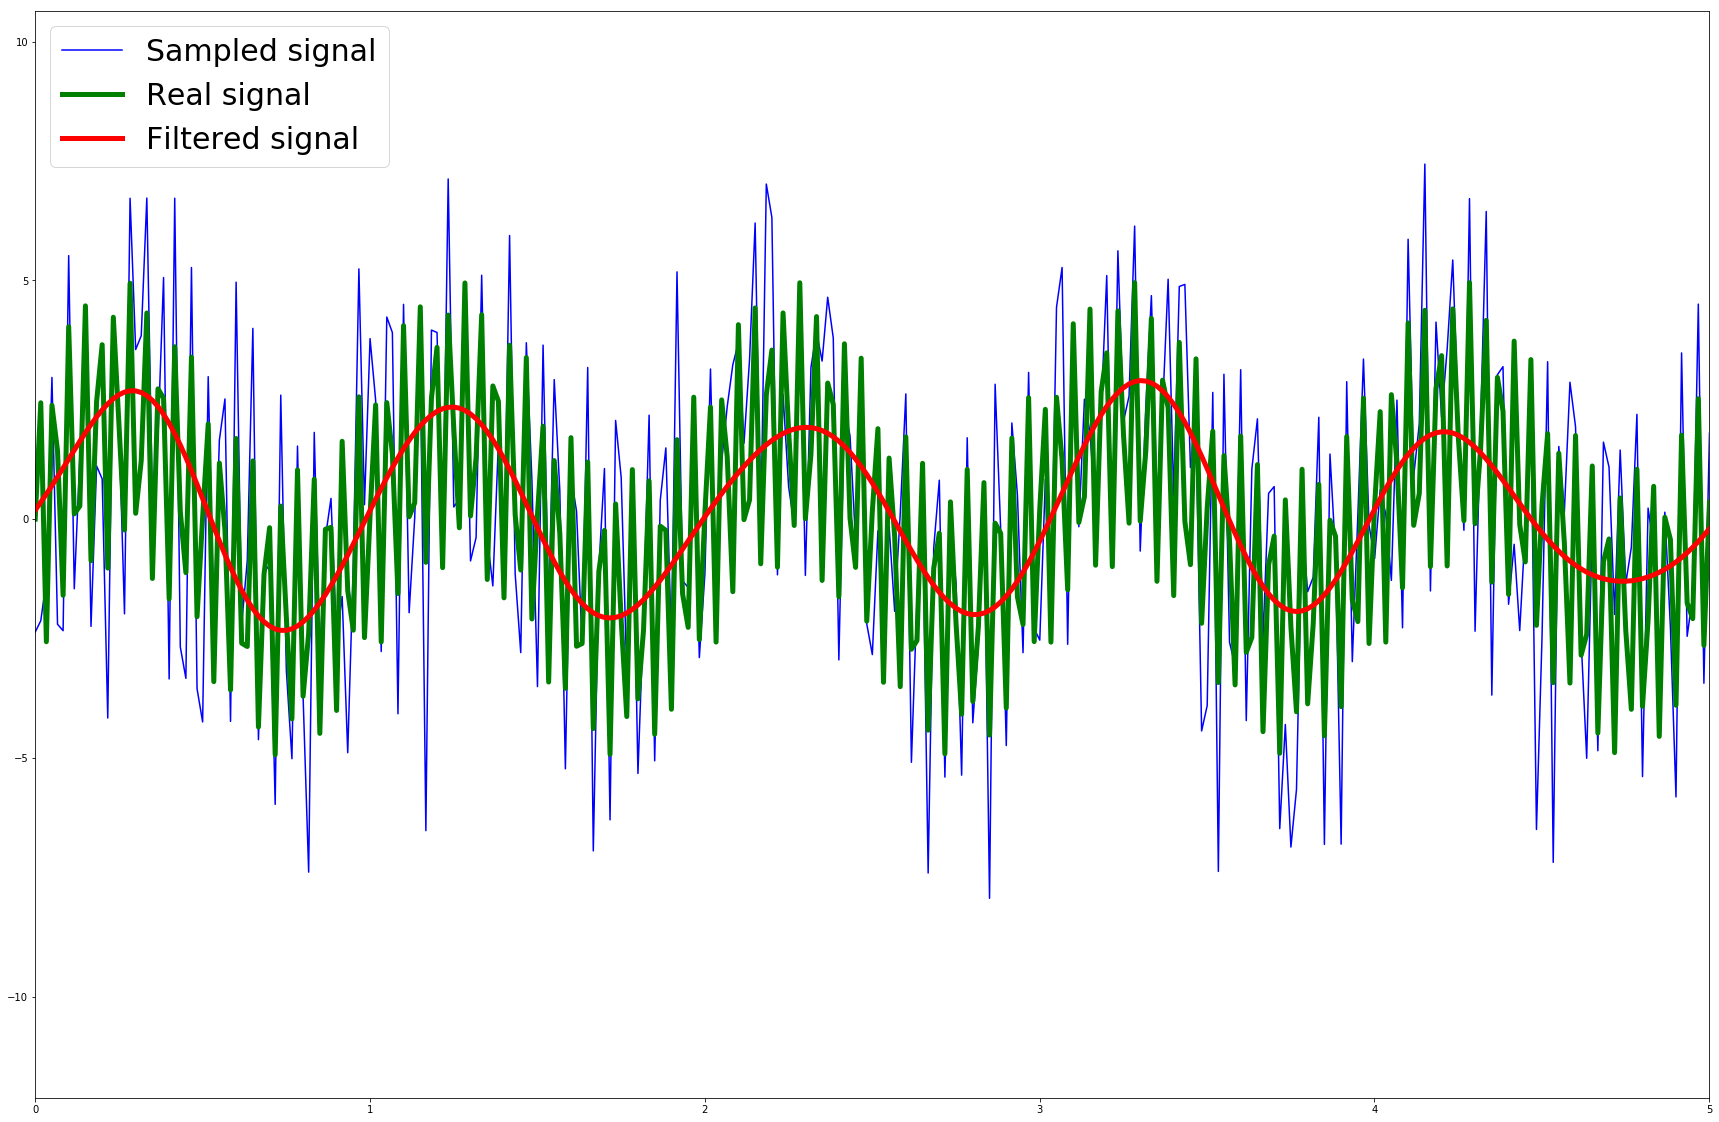

In [124]:
plt.figure(figsize=(30, 20))
plt.xlim(0, 5)
plt.plot(t, f, 'b-')
plt.plot(t, real_signal, 'g', lw=5)
plt.plot(t, f_filtered.real, 'r-', lw=5)
plt.legend(['Sampled signal', 'Real signal', 'Filtered signal'], prop={'size': 30})

#### Drugi nacin
Koristimo konvoluciju i konvolutivni filter

In [126]:
H = np.abs(freq) < 2

6000

In [136]:
f_inv = np.fft.ifft(H)
h = np.fft.ifftshift(f_inv)

In [139]:
from scipy import signal

In [140]:
f_conv_filtered = signal.convolve(f, h, mode='same')

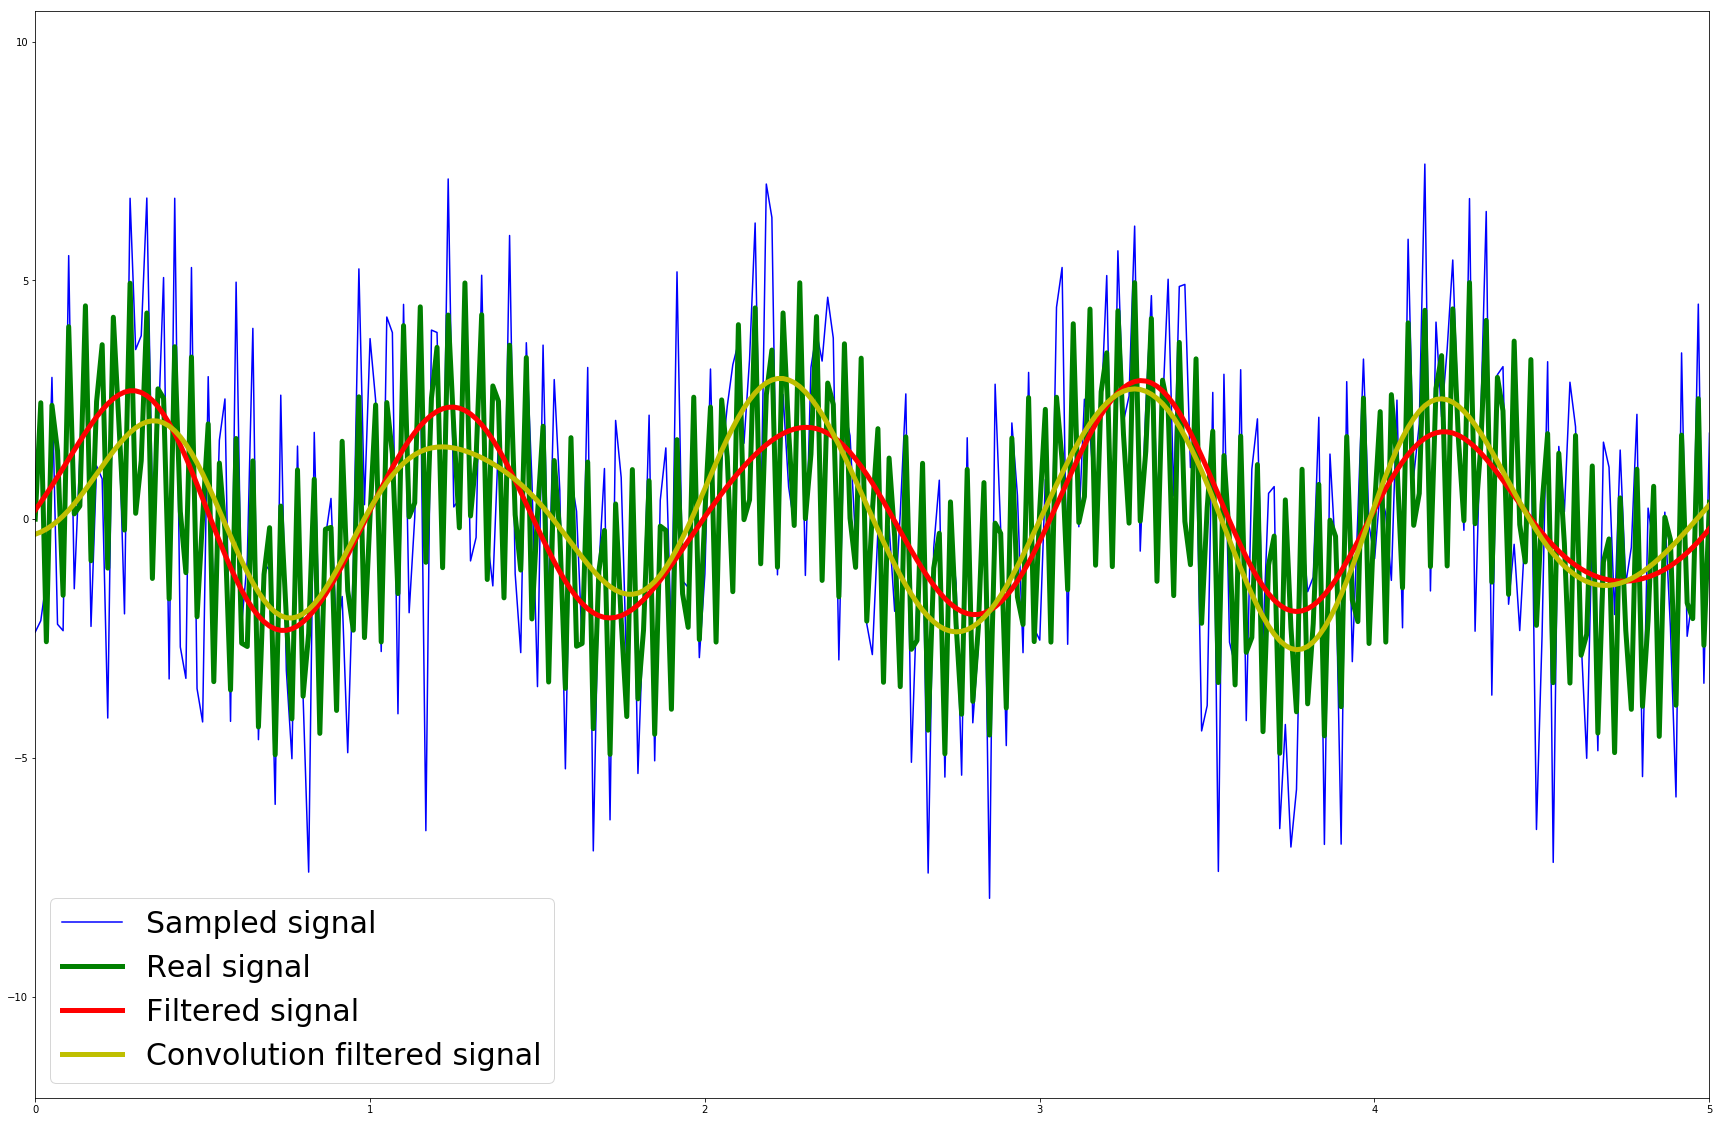

In [142]:
plt.figure(figsize=(30, 20))
plt.xlim(0, 5)
plt.plot(t, f, 'b-')
plt.plot(t, real_signal, 'g', lw=5)
plt.plot(t, f_filtered.real, 'r-', lw=5)
plt.plot(t, f_conv_filtered, 'y-', lw=5)
plt.legend(['Sampled signal', 'Real signal', 'Filtered signal', 'Convolution filtered signal'], prop={'size': 30})